In [49]:
# 选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构
# 当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

In [50]:
import numpy as np
from PIL import Image
from scipy.linalg import svd # svd奇异值分解
from matplotlib import pyplot as plt

In [51]:
img = Image.open("F:/BI/第四周/名企班/psb.jpg")

In [52]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [53]:
img.mode, img.size

('RGB', (2134, 1600))

In [54]:
im_gray = img.convert('L')
im_gray.mode

'L'

In [55]:
img_arr = np.array(img)
img_arr.shape

(1600, 2134, 3)

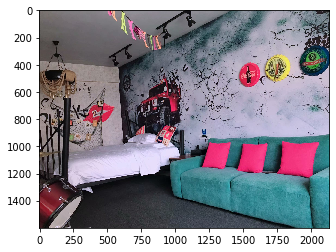

In [56]:
plt.imshow(img_arr, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

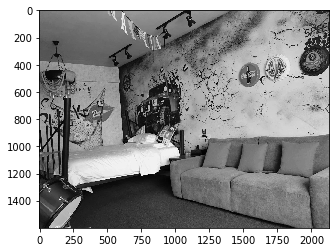

In [57]:
plt.imshow(im_gray, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [58]:
im_gray_arr = np.array(im_gray)
im_gray_arr.shape

(1600, 2134)

In [59]:
# 奇异值分解

In [60]:
p, s, q = svd(im_gray_arr, 
              full_matrices=False) #If False,the shapes are `(M, K)` and `(K, N)`,where `K = min(M, N)`

In [61]:
p.shape, s.shape, q.shape

((1600, 1600), (1600,), (1600, 2134))

In [62]:
# 进行图像的还原

In [63]:
def get_image_feature(p, q, s, k):
    "取Top-k个特征对图像进行还原"
    temp_s = np.zeros(s.shape[0])
    temp_s[:k] = s[:k]
    s = temp_s * np.identity(s.shape[0])
    temp = np.dot(p, s)
    temp = np.dot(temp, q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.title("k=%d" % k)
    plt.axis('off')
    plt.show()
    print(np.square(im_gray_arr - temp).sum())

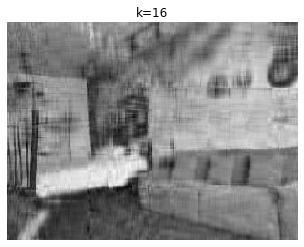

1711391853.908876


In [64]:
# 取1%
k = int(s.shape[0] * 0.01)
get_image_feature(p, q, s, k)

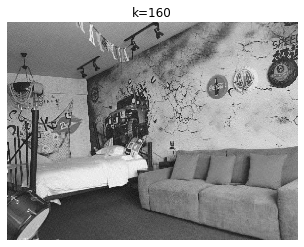

239597491.37719437


In [65]:
# 取10%
k = int(s.shape[0] * 0.1)
get_image_feature(p, q, s, k)

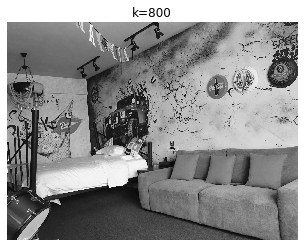

4084569.604661143


In [66]:
# 取50%
k = int(s.shape[0] * 0.5)
get_image_feature(p, q, s, k)